In [1]:
# import the Pandas, Matplotlib, and NumPy dependencies in the first cell, and run the cell.

# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [6]:
### 6.2.6 - Get the City Weather Data

import time

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        time.sleep(60)
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | manggar
Processing Record 3 of Set 1 | bar harbor
Processing Record 4 of Set 1 | port macquarie
Processing Record 5 of Set 1 | risor
Processing Record 6 of Set 1 | ugoofaaru
Processing Record 7 of Set 1 | havoysund
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | provideniya
Processing Record 10 of Set 1 | alice springs
Processing Record 11 of Set 1 | yantal
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | jackson
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | ixtapa
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | maholi
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | saskylakh
Processing Record 22 of Set 1 | rikitea
Processing Record 23 of Set 1 | taolanaro
City 

Processing Record 38 of Set 4 | obidos
Processing Record 39 of Set 4 | butaritari
Processing Record 40 of Set 4 | haines junction
Processing Record 41 of Set 4 | verkhnyaya inta
Processing Record 42 of Set 4 | esperance
Processing Record 43 of Set 4 | anadyr
Processing Record 44 of Set 4 | marzuq
Processing Record 45 of Set 4 | ushumun
Processing Record 46 of Set 4 | russell
Processing Record 47 of Set 4 | hobyo
Processing Record 48 of Set 4 | torbay
Processing Record 49 of Set 4 | hobart
Processing Record 50 of Set 4 | shache
Processing Record 1 of Set 5 | east london
Processing Record 2 of Set 5 | ahipara
Processing Record 3 of Set 5 | lethem
Processing Record 4 of Set 5 | vicuna
Processing Record 5 of Set 5 | bredasdorp
Processing Record 6 of Set 5 | la sarre
Processing Record 7 of Set 5 | dhidhdhoo
Processing Record 8 of Set 5 | synya
Processing Record 9 of Set 5 | marcona
City not found. Skipping...
Processing Record 10 of Set 5 | carbondale
Processing Record 11 of Set 5 | iluliss

Processing Record 26 of Set 8 | north platte
Processing Record 27 of Set 8 | koumac
Processing Record 28 of Set 8 | lensk
Processing Record 29 of Set 8 | faya
Processing Record 30 of Set 8 | dagana
Processing Record 31 of Set 8 | yar-sale
Processing Record 32 of Set 8 | vallenar
Processing Record 33 of Set 8 | kristinehamn
Processing Record 34 of Set 8 | fayaoue
Processing Record 35 of Set 8 | florence
Processing Record 36 of Set 8 | husavik
Processing Record 37 of Set 8 | port lincoln
Processing Record 38 of Set 8 | bogorodskoye
Processing Record 39 of Set 8 | hualmay
Processing Record 40 of Set 8 | gladstone
Processing Record 41 of Set 8 | snasa
Processing Record 42 of Set 8 | dengzhou
Processing Record 43 of Set 8 | maragogi
Processing Record 44 of Set 8 | blackfoot
Processing Record 45 of Set 8 | buseresere
Processing Record 46 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 47 of Set 8 | alugan
Processing Record 48 of Set 8 | alofi
Processing Record

Processing Record 17 of Set 12 | pennagaram
Processing Record 18 of Set 12 | mayo
Processing Record 19 of Set 12 | skibbereen
Processing Record 20 of Set 12 | tomatlan
Processing Record 21 of Set 12 | troitskoye
Processing Record 22 of Set 12 | brae
Processing Record 23 of Set 12 | terme
Processing Record 24 of Set 12 | dudinka
Processing Record 25 of Set 12 | qasigiannguit
Processing Record 26 of Set 12 | ocampo
Processing Record 27 of Set 12 | xinmin
Processing Record 28 of Set 12 | coolum beach
Processing Record 29 of Set 12 | uyuni
Processing Record 30 of Set 12 | lubumbashi
Processing Record 31 of Set 12 | belmonte
Processing Record 32 of Set 12 | trairi
Processing Record 33 of Set 12 | polaniec
Processing Record 34 of Set 12 | muncar
Processing Record 35 of Set 12 | bokspits
City not found. Skipping...
Processing Record 36 of Set 12 | olavarria
Processing Record 37 of Set 12 | maneadero
Processing Record 38 of Set 12 | sarangani
Processing Record 39 of Set 12 | hambantota
Process

In [8]:
# tally the number of cities in the city_data array

len(city_data)

571

In [9]:
### 6.2.7 Create a DataFrame of City Weather Data

# convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,33.46,86,90,33.38,AR,2021-05-28 19:11:41
1,Manggar,-2.8833,108.2667,80.91,77,82,2.80,ID,2021-05-28 19:14:09
2,Bar Harbor,44.3876,-68.2039,60.53,37,1,8.01,US,2021-05-28 19:14:10
3,Port Macquarie,-31.4333,152.9167,51.89,79,100,15.75,AU,2021-05-28 19:14:10
4,Risor,58.7206,9.2342,60.17,78,0,5.84,NO,2021-05-28 19:14:11
5,Ugoofaaru,5.6667,73.0000,84.06,74,17,21.47,MV,2021-05-28 19:09:17
6,Havoysund,70.9963,24.6622,35.83,63,100,17.27,NO,2021-05-28 19:14:11
7,Albany,42.6001,-73.9662,57.27,64,100,5.28,US,2021-05-28 19:14:11
8,Provideniya,64.3833,-173.3000,42.30,45,4,12.17,RU,2021-05-28 19:14:12
9,Alice Springs,-23.7000,133.8833,36.95,75,2,6.58,AU,2021-05-28 19:10:47


In [10]:
# reorder the columns

new_column_order = ["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

In [11]:
city_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,90,AR,2021-05-28 19:11:41,86,-54.8000,-68.3000,33.46,33.38
1,Manggar,82,ID,2021-05-28 19:14:09,77,-2.8833,108.2667,80.91,2.80
2,Bar Harbor,1,US,2021-05-28 19:14:10,37,44.3876,-68.2039,60.53,8.01
3,Port Macquarie,100,AU,2021-05-28 19:14:10,79,-31.4333,152.9167,51.89,15.75
4,Risor,0,NO,2021-05-28 19:14:11,78,58.7206,9.2342,60.17,5.84
...,...,...,...,...,...,...,...,...,...
566,Marsa Matruh,0,EG,2021-05-28 19:28:54,73,31.3525,27.2453,71.80,9.22
567,Suchitlan,40,MX,2021-05-28 19:28:54,42,19.3667,-103.7167,83.19,6.42
568,San Quintin,22,MX,2021-05-28 19:28:55,65,30.4833,-115.9500,65.28,14.36
569,Sola,100,VU,2021-05-28 19:28:55,65,-13.8833,167.5500,77.32,12.06


In [12]:
# # Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,90,AR,2021-05-28 19:11:41,86,-54.8000,-68.3000,33.46,33.38
1,Manggar,82,ID,2021-05-28 19:14:09,77,-2.8833,108.2667,80.91,2.80
2,Bar Harbor,1,US,2021-05-28 19:14:10,37,44.3876,-68.2039,60.53,8.01
3,Port Macquarie,100,AU,2021-05-28 19:14:10,79,-31.4333,152.9167,51.89,15.75
4,Risor,0,NO,2021-05-28 19:14:11,78,58.7206,9.2342,60.17,5.84


In [14]:
#### Unit 3 - Plot Weather Data
### 6.3.1 - Plot Latitude vs Temperature

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

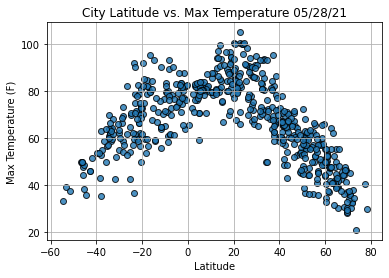

In [15]:
# Plot the data - we need the date at the top of the plot 

# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

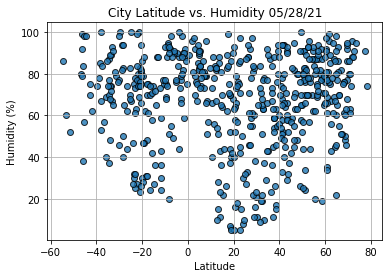

In [17]:
### 6.3.2 - Plot Latitude vs Humidity

# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

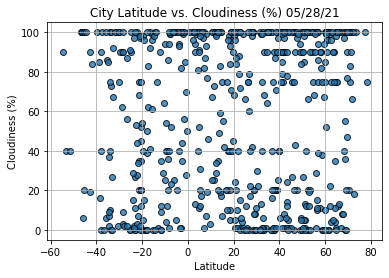

In [16]:
### 6.3.3 - Plot Latitude vs Cloudiness

# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

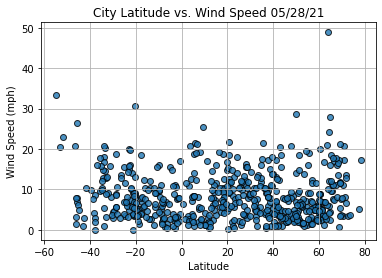

In [18]:
### 6.3.4 - Plot Latitude vs Wind Speed

# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [ ]:
#### Unit 4 - Determine Correlations
### 6.4.1: Use Linear Regression to Find the Relationship Between Variables

## Practice Using Linear Regression

In [ ]:
### 6.4.2 - Find the Correlation Between Latitude and Maximum Temperature 
## Create a Linear Regression Function 

# Let's create a function, "plot_linear_regression"

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [ ]:
# there will be no output until we call the function with five parameters

In [20]:
## Create the Hemisphere DataFrames
# To create a new DataFrame from a current DataFrame, we can use the loc method on the current DataFrame.

index13 = city_data_df.loc[13]
index13

City                      Jackson
Cloudiness                      1
Country                        US
Date          2021-05-28 19:14:02
Humidity                       45
Lat                       42.4165
Lng                     -122.8345
Max Temp                    69.37
Wind Speed                   3.44
Name: 13, dtype: object

In [21]:
# filter dataframe based on value of a row
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4       True
       ...  
566     True
567     True
568     True
569    False
570     True
Name: Lat, Length: 571, dtype: bool

In [22]:
# If we want to return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0

city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
2,Bar Harbor,1,US,2021-05-28 19:14:10,37,44.3876,-68.2039,60.53,8.01
4,Risor,0,NO,2021-05-28 19:14:11,78,58.7206,9.2342,60.17,5.84
5,Ugoofaaru,17,MV,2021-05-28 19:09:17,74,5.6667,73.0000,84.06,21.47
6,Havoysund,100,NO,2021-05-28 19:14:11,63,70.9963,24.6622,35.83,17.27
7,Albany,100,US,2021-05-28 19:14:11,64,42.6001,-73.9662,57.27,5.28


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# now we can perform linear regression on latitude and maximum temperature from each hemisphere DataFRame

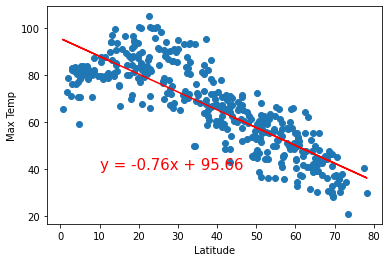

In [24]:
## Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

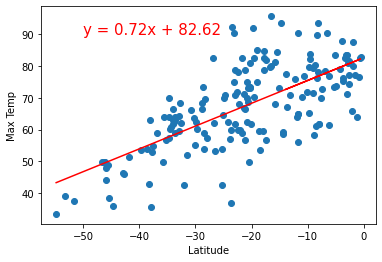

In [25]:
## Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

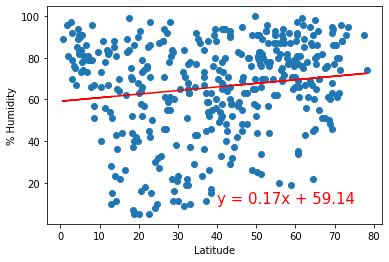

In [26]:
### 6.4.3 - Find the Correlation Between Latitude and Percent Humidity

## Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

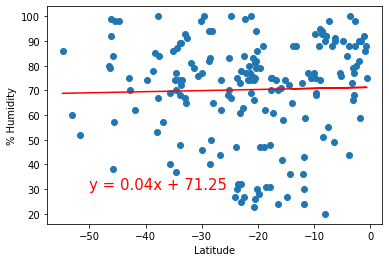

In [29]:
## Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,30))

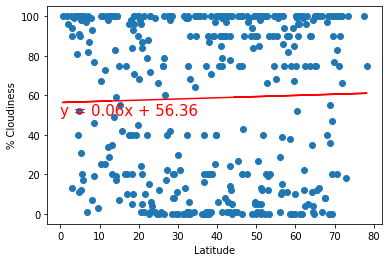

In [33]:
### 6.4.4 - Find the Correlation Between Latitude and Percent Cloudiness

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,50))

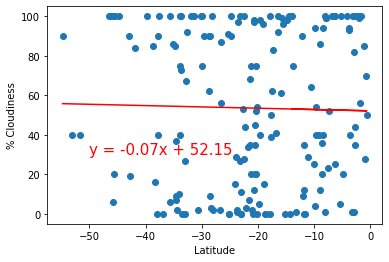

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,30))

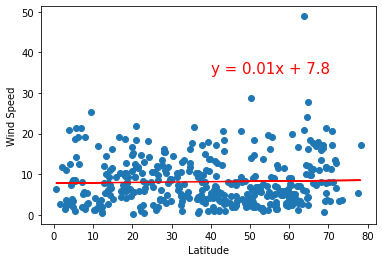

In [34]:
## 6.4.5 - Find the Correlation Between Latitude and Wind Speed

## Perform Linear Regression on the Wind Speed for the Northern Hemisphere

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

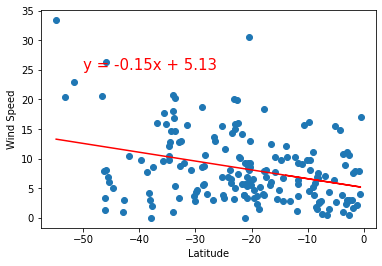

In [36]:
## Perform Linear Regression on the Wind Speed for the Southern Hemisphere

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))